In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [2]:
df = pd.read_csv("./Plankton/MasterTable_AI_FlowCAM.csv")
df_simcoe = df[df["Loc"] == "LSIMC"] 
print(len(df_simcoe))
df_simcoe_drop_dup = df_simcoe.drop_duplicates()
print(len(df_simcoe_drop_dup))
print(len(df_simcoe) - len(df_simcoe_drop_dup))
df_simcoe_drop_dup_by_tif = df_simcoe.drop_duplicates(subset=["tifffile"])
print(len(df_simcoe_drop_dup_by_tif))

9525
8793
732
8101


In [3]:
df_simcoe_drop_dup

,tifffile,csvfile,Year,SAM,Month,Day,Rep,repnum,Key,Loc,...,FR,volbest,WhitefishDen,UnknwCoregonine,CiscoDen,Exposure,SmeltDen,YPerchDen,BurbotDen,OtherFishDen
8282,20170516_Simcoe_121_2mm_rep1_000001.tif,20170516_SIMC_121_2mm_rep1_KG_data.csv,2017,121,5,16,rep1,1,2017.SIMC.121.1.NA,LSIMC,...,Random,18.777738,0.0,0.0,0.0,1.333831e+06,NaN,0.0602,0.0,0.0
8283,20170516_Simcoe_121_2mm_rep1_000002.tif,20170516_SIMC_121_2mm_rep1_KG_data.csv,2017,121,5,16,rep1,1,2017.SIMC.121.1.NA,LSIMC,...,Random,18.777738,0.0,0.0,0.0,1.333831e+06,NaN,0.0602,0.0,0.0
8284,20170516_Simcoe_121_2mm_rep1_000003.tif,20170516_SIMC_121_2mm_rep1_KG_data.csv,2017,121,5,16,rep1,1,2017.SIMC.121.1.NA,LSIMC,...,Random,18.777738,0.0,0.0,0.0,1.333831e+06,NaN,0.0602,0.0,0.0
8285,20170516_Simcoe_121_2mm_rep1_000004.tif,20170516_SIMC_121_2mm_rep1_KG_data.csv,2017,121,5,16,rep1,1,2017.SIMC.121.1.NA,LSIMC,...,Random,18.777738,0.0,0.0,0.0,1.333831e+06,NaN,0.0602,0.0,0.0
8286,20170516_Simcoe_121_2mm_rep1_000005.tif,20170516_SIMC_121_2mm_rep1_KG_data.csv,2017,121,5,16,rep1,1,2017.SIMC.121.1.NA,LSIMC,...,Random,18.777738,0.0,0.0,0.0,1.333831e+06,NaN,0.0602,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,20190617_Simcoe_230_2mm_rep1_KG_000041.tif,20190617_SIMC_230_2mm_rep1_AD_data.csv,2019,230,6,17,rep1,1,2019.SIMC.230.1.NA,LSIMC,...,Fixed,10.541584,0.0,0.0,0.0,4.791436e+05,NaN,0.0285,0.0,0.0
17803,20190617_Simcoe_230_2mm_rep1_KG_000042.tif,20190617_SIMC_230_2mm_rep1_AD_data.csv,2019,230,6,17,rep1,1,2019.SIMC.230.1.NA,LSIMC,...,Fixed,10.541584,0.0,0.0,0.0,4.791436e+05,NaN,0.0285,0.0,0.0
17804,20190617_Simcoe_230_2mm_rep1_KG_000043.tif,20190617_SIMC_230_2mm_rep1_AD_data.csv,2019,230,6,17,rep1,1,2019.SIMC.230.1.NA,LSIMC,...,Fixed,10.541584,0.0,0.0,0.0,4.791436e+05,NaN,0.0285,0.0,0.0
17805,20190617_Simcoe_230_2mm_rep1_KG_000044.tif,20190617_SIMC_230_2mm_rep1_AD_data.csv,2019,230,6,17,rep1,1,2019.SIMC.230.1.NA,LSIMC,...,Fixed,10.541584,0.0,0.0,0.0,4.791436e+05,NaN,0.0285,0.0,0.0


In [4]:
df_simcoe_drop_dup_by_tif["exist"]  = [True if os.path.isfile("./Plankton/SIMC_OverlapTiffsWithPP/SIMC_OverlapTiffsWithPP/" + str(x)) else False for x in df_simcoe_drop_dup_by_tif["tifffile"]]
df_simcoe_drop_dup_by_tif[df_simcoe_drop_dup_by_tif['exist'] != True]

C:\Users\User\AppData\Local\Temp/ipykernel_15880/1770675851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simcoe_drop_dup_by_tif["exist"]  = [True if os.path.isfile("./Plankton/SIMC_OverlapTiffsWithPP/SIMC_OverlapTiffsWithPP/" + str(x)) else False for x in df_simcoe_drop_dup_by_tif["tifffile"]]


,tifffile,csvfile,Year,SAM,Month,Day,Rep,repnum,Key,Loc,...,volbest,WhitefishDen,UnknwCoregonine,CiscoDen,Exposure,SmeltDen,YPerchDen,BurbotDen,OtherFishDen,exist
14290,20180522_Simcoe_146_2mm_rep1_000157.tif,20180522_SIMC_146_2mm_rep1a_redo_KG_data.csv,2018,146,5,22,rep1,1,2018.SIMC.146.1.NA,LSIMC,...,10.789587,0.005310,0.00531,0.021300,9.170327e+05,NaN,0.0,0.0,0.0,False
14291,20180522_Simcoe_146_2mm_rep1_000158.tif,20180522_SIMC_146_2mm_rep1a_redo_KG_data.csv,2018,146,5,22,rep1,1,2018.SIMC.146.1.NA,LSIMC,...,10.789587,0.005310,0.00531,0.021300,9.170327e+05,NaN,0.0,0.0,0.0,False
14292,20180522_Simcoe_146_2mm_rep3_redo_000001.tif,20180522_SIMC_146_2mm_rep3_redo_KG_data.csv,2018,146,5,22,rep3,3,2018.SIMC.146.3.redo,LSIMC,...,10.789587,0.005310,0.00531,0.021300,9.170327e+05,NaN,0.0,0.0,0.0,False
16407,20182905_Simcoe_198_2mm_rep1_redo_000028.tif,20180529_SIMC_198_2mm_rep1_redo_KG_data.csv,2018,198,5,29,rep1,1,2018.SIMC.198.1.redo,LSIMC,...,12.278842,0.000000,0.00000,0.000000,1.196587e+06,NaN,0.0,0.0,0.0,False
16409,20182905_Simcoe_198_2mm_rep1_redo_000029.tif,20180529_SIMC_198_2mm_rep1_redo_KG_data.csv,2018,198,5,29,rep1,1,2018.SIMC.198.1.redo,LSIMC,...,12.278842,0.000000,0.00000,0.000000,1.196587e+06,NaN,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16545,20190503_Simcoe_11_2mm_rep3_KG_000013.tif,20190503_SIMC_011_2mm_rep3_AD_data.csv,2019,11,5,3,rep3,3,2019.SIMC.011.3.NA,LSIMC,...,15.569541,0.584153,0.00000,0.027800,9.185250e+05,NaN,0.0,0.0,0.0,False
16546,20190503_Simcoe_11_2mm_rep3_KG_000014.tif,20190503_SIMC_011_2mm_rep3_AD_data.csv,2019,11,5,3,rep3,3,2019.SIMC.011.3.NA,LSIMC,...,15.569541,0.584153,0.00000,0.027800,9.185250e+05,NaN,0.0,0.0,0.0,False
16547,20190503_Simcoe_11_2mm_rep3_KG_000015.tif,20190503_SIMC_011_2mm_rep3_AD_data.csv,2019,11,5,3,rep3,3,2019.SIMC.011.3.NA,LSIMC,...,15.569541,0.584153,0.00000,0.027800,9.185250e+05,NaN,0.0,0.0,0.0,False
16548,20190503_Simcoe_11_2mm_rep3_KG_000016.tif,20190503_SIMC_011_2mm_rep3_AD_data.csv,2019,11,5,3,rep3,3,2019.SIMC.011.3.NA,LSIMC,...,15.569541,0.584153,0.00000,0.027800,9.185250e+05,NaN,0.0,0.0,0.0,False


In [5]:
df_simcoe_drop_dup.groupby("Year").count()

,tifffile,csvfile,SAM,Month,Day,Rep,repnum,Key,Loc,SITE,...,FR,volbest,WhitefishDen,UnknwCoregonine,CiscoDen,Exposure,SmeltDen,YPerchDen,BurbotDen,OtherFishDen
Year,,,,,,,,,,,,,,,,,,,,,
2017,996,996,996,996,996,996,996,996,996,996,...,996,996,850,850,850,996,0,996,996,996
2018,6493,6493,6493,6493,6493,6493,6493,6493,6493,6493,...,6493,6493,6493,6493,6493,6463,0,6493,6493,6493
2019,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,...,1304,1304,1304,1304,1304,1184,0,1304,1304,1304


In [6]:
df_simcoe_drop_dup.groupby("Month").count()

,tifffile,csvfile,Year,SAM,Day,Rep,repnum,Key,Loc,SITE,...,FR,volbest,WhitefishDen,UnknwCoregonine,CiscoDen,Exposure,SmeltDen,YPerchDen,BurbotDen,OtherFishDen
Month,,,,,,,,,,,,,,,,,,,,,
4,428,428,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,0,428,428,428
5,7221,7221,7221,7221,7221,7221,7221,7221,7221,7221,...,7221,7221,7159,7159,7159,7191,0,7221,7221,7221
6,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1060,1060,1060,1024,0,1144,1144,1144


In [7]:
df_csv = pd.read_csv("./Plankton/SIMC.Overlap.csv/20170516_SIMC_121_2mm_rep2_KG_data.csv")
df_csv

,Class.Particle.ID,Class,Area..ABD.,Area..Filled.,Aspect.Ratio,Calibration.Factor,Calibration.Image,Camera,Capture.X,Capture.Y,...,Sphere.Volume,Sum.Intensity,Symmetry,Time,Timestamp,Transparency,Volume..ABD.,Volume..ESD.,Width,Particle.ID
0,1,TooSmall,35616.3322,35616.3322,0.7954,9.47,1,1,38,193,...,0,62243,0.7632,07:51:31,2019-01-10T07:51:31.305,0.0759,5056355,6406954.0,194.135,1
1,2,TooSmall,34646.0007,34646.0007,0.6597,9.47,1,1,45,1766,...,0,61298,0.7551,07:51:31,2019-01-10T07:51:31.419,0.0823,4851136,6276255.0,165.725,2
2,32,Cyclopoid_1,116223.0686,116223.0686,0.5100,9.47,1,1,681,1198,...,0,113991,0.5098,07:51:31,2019-01-10T07:51:31.531,0.2485,29805900,70237760.0,326.715,3
3,3,TooSmall,34496.9200,34496.9200,0.7212,9.47,1,1,888,44,...,0,68257,0.7337,07:51:31,2019-01-10T07:51:31.642,0.1078,4819858,6787311.0,194.135,4
4,336,Cyclopoid_1,288562.5860,288646.3764,0.4348,9.47,1,1,9,403,...,0,362868,0.0826,07:51:31,2019-01-10T07:51:31.642,0.4573,116606800,729592800.0,639.225,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,25,Calanoid_1,141863.2575,143412.2939,0.4510,9.47,1,1,453,1574,...,0,141165,0.5608,08:01:21,2019-01-10T08:01:21.205,0.1942,40194690,76821560.0,317.245,2725
2725,180,Cyclopoid_1,124715.3709,124715.3709,0.3839,9.47,1,1,782,963,...,0,198555,0.3318,08:01:21,2019-01-10T08:01:21.429,0.4288,33131700,177771500.0,449.825,2726
2726,1277,TooSmall,34496.9200,34496.9200,0.4529,9.47,1,1,316,826,...,0,68280,0.6622,08:01:22,2019-01-10T08:01:22.213,0.2398,4819858,10970450.0,146.785,2727
2727,321,Calanoid_1,219411.2789,219411.2789,0.3997,9.47,1,1,57,1585,...,0,321805,0.3042,08:01:22,2019-01-10T08:01:22.213,0.5093,77312950,654489600.0,733.925,2728


In [8]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "./Plankton/SIMC.Overlap.csv/*.csv"))))
print(len(df))
display(df.describe())

1239578


,Class.Particle.ID,Area..ABD.,Area..Filled.,Aspect.Ratio,Calibration.Factor,Calibration.Image,Camera,Capture.X,Capture.Y,Circle.Fit,...,Sum.Intensity,Symmetry,Transparency,Volume..ABD.,Volume..ESD.,Width,Particle.ID,Biovolume..Cylinder.,Biovolume..P..Spheroid.,Biovolume..Sphere.
count,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1239578.0,1.239578e+06,1.239578e+06,1.239578e+06,...,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,1.239578e+06,2.092300e+04,2.092300e+04,2.092300e+04
mean,1.126679e+03,1.062026e+05,1.093936e+05,5.190144e-01,9.470000e+00,1.013413e+00,1.0,5.047197e+02,9.147197e+02,2.879011e-01,...,1.481472e+05,4.473579e-01,2.927093e-01,4.567134e+07,4.078348e+08,3.168146e+02,2.752334e+03,3.938473e+07,2.916667e+08,1.198264e+08
std,1.069608e+03,2.822416e+05,3.770143e+05,1.880542e-01,1.304593e-10,2.023796e-01,0.0,2.903060e+02,5.669098e+02,2.480175e-01,...,2.907087e+05,1.958169e-01,1.616447e-01,9.742488e+08,4.952681e+09,2.313154e+02,1.811044e+03,2.875343e+08,1.443193e+09,5.376428e+08
min,1.000000e+00,3.145320e+04,3.145320e+04,1.130000e-02,9.470000e+00,1.000000e+00,1.0,7.000000e+00,0.000000e+00,0.000000e+00,...,2.225900e+04,6.000000e-04,4.700000e-03,4.196246e+06,4.505615e+06,2.367500e+01,1.000000e+00,7.513293e+05,3.803144e+05,4.196246e+06
25%,2.790000e+02,4.004686e+04,4.012231e+04,3.928000e-01,9.470000e+00,1.000000e+00,1.0,2.500000e+02,4.060000e+02,5.600000e-03,...,7.148100e+04,3.084000e-01,1.862000e-01,6.028601e+06,1.278993e+07,1.941350e+02,1.244000e+03,1.824552e+07,5.030023e+07,4.647549e+07
50%,7.890000e+02,5.928158e+04,5.951453e+04,4.977000e-01,9.470000e+00,1.000000e+00,1.0,4.910000e+02,9.030000e+02,2.747000e-01,...,9.941200e+04,4.606000e-01,2.635000e-01,1.085784e+07,3.002910e+07,2.414850e+02,2.524000e+03,2.708239e+07,1.040966e+08,8.763443e+07
75%,1.704000e+03,1.281203e+05,1.289316e+05,6.485000e-01,9.470000e+00,1.000000e+00,1.0,7.550000e+02,1.417000e+03,4.836000e-01,...,1.708350e+05,5.866000e-01,3.539000e-01,3.449774e+07,1.536179e+08,3.645950e+02,4.066000e+03,3.652294e+07,2.355913e+08,1.102701e+08
max,7.108000e+03,6.105333e+07,9.489302e+07,1.000000e+00,9.470000e+00,8.000000e+00,1.0,1.118000e+03,1.906000e+03,9.819000e-01,...,6.276333e+07,1.000000e+00,9.168000e-01,3.588623e+11,1.025208e+12,8.707665e+03,9.762000e+03,2.796606e+10,9.667867e+10,2.347949e+10


In [9]:
df["Image.File"].drop_duplicates()

0           20170510_Simcoe_95_2mm_rep1_000001.tif
152         20170510_Simcoe_95_2mm_rep1_000002.tif
291         20170510_Simcoe_95_2mm_rep1_000003.tif
440         20170510_Simcoe_95_2mm_rep1_000004.tif
569         20170510_Simcoe_95_2mm_rep1_000005.tif
                           ...                    
2646    20190617_Simcoe_238_2mm_rep2_KG_000031.tif
2731    20190617_Simcoe_238_2mm_rep2_KG_000032.tif
2819    20190617_Simcoe_238_2mm_rep2_KG_000033.tif
2896    20190617_Simcoe_238_2mm_rep2_KG_000034.tif
2981    20190617_Simcoe_238_2mm_rep2_KG_000035.tif
Name: Image.File, Length: 8154, dtype: object

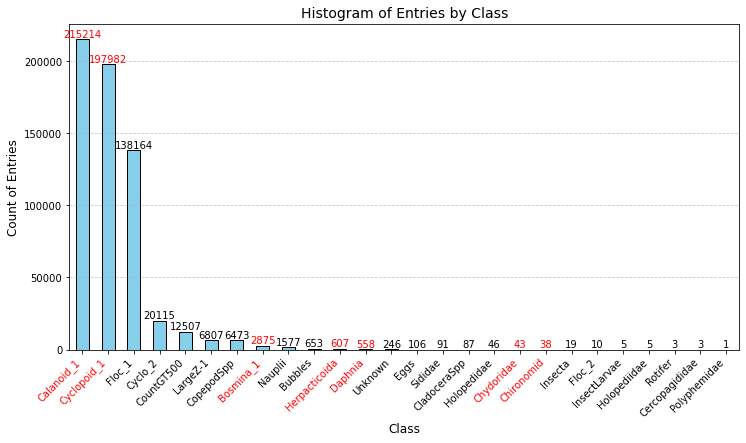

In [10]:
df = df[df['Class'] != 'TooSmall']
class_counts = df['Class'].value_counts()

plt.figure(figsize=(12, 6))
bars = class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight specific class labels in red
highlight_classes = {'Calanoid_1', 'Cyclopoid_1', 'Bosmina_1', 'Herpacticoida', 'Chironomid', 'Chydoridae', 'Daphnia'}
plt.xticks(rotation=45, ha='right', fontsize=10)
ax = plt.gca()
for tick in ax.get_xticklabels():
    if tick.get_text() in highlight_classes:
        tick.set_color('red')

# Add counts on top of bars and highlight them in red if applicable
for index, (label, value) in enumerate(class_counts.items()):
    color = 'red' if label in highlight_classes else 'black'
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color=color)

plt.title('Histogram of Entries by Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count of Entries', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
df = df[df['Class'] != 'TooSmall']
df.groupby("Class")[["Diameter..ABD.", "Diameter..ESD."]].describe()

Diameter..ABD.                                                  \
                        count         mean          std       min         25%   
Class                                                                           
Bosmina_1              2875.0   435.689926    51.123682  257.1579  401.840300   
Bubbles                 653.0   796.949527  1007.130741  224.5288  466.838700   
Calanoid_1           215214.0   472.048006   104.813855  200.8232  389.068200   
Cercopagididae            3.0  1040.591000   185.676422  916.6060  933.854200   
Chironomid               38.0   611.525339   305.247272  249.2449  369.431475   
Chydoridae               43.0   402.385105    70.641431  275.0952  363.090800   
CladoceraSpp             87.0   500.229798   183.581361  316.4326  394.318550   
CopepodSpp             6473.0   390.162486    74.936927  205.4694  335.787300   
CountGT500            12507.0   553.804793   332.662358  200.1186  393.803400   
Cyclo_2               20115.0   451.894227   101.924062  257.1579  372.894500   
Cyclopoid_1          197982.0   413.155123   106.991427  210.4817  323.985700   
Daphnia                 558.0   573.298672   205.709021  297.3195  417.182775   
Eggs                    106.0   467.322047   104.358544  237.2619  390.617425   
Floc_1               138164.0   364.542926   278.517388  200.1186  237.057900   
Floc_2                   10.0  1636.393130   956.131129  313.0777  838.462025   
Herpacticoida           607.0   362.982755   123.019153  215.6178  278.669100   
Holopedidae              46.0   446.540041    60.991749  335.1833  396.281925   
Holopediidae              5.0   757.654700   113.524320  644.0224  679.839700   
InsectLarvae              5.0   662.834000   185.951710  423.2886  597.995500   
Insecta                  19.0   713.565268   239.049421  260.5667  554.693600   
LargeZ-1               6807.0   436.968954   352.411038  200.1186  289.159900   
Nauplii                1577.0   271.123373    21.325431  220.4368  256.395100   
Polyphemidae              1.0   587.482000          NaN  587.4820  587.482000   
Rotifer                   3.0   311.617867    30.438208  276.7084  301.124050   
Sididae                  91.0   490.829905   144.795396  297.4875  415.690000   
Unknown                 246.0   459.446014   198.756180  211.3824  349.968150   

                                                   Diameter..ESD.  \
                       50%          75%        max          count   
Class                                                               
Bosmina_1        433.71070   466.558500   632.2813         2875.0   
Bubbles          513.55750   594.510300  8601.8337          653.0   
Calanoid_1       482.61980   550.708800  1160.1373       215214.0   
Cercopagididae   951.10240  1102.583500  1254.0646            3.0   
Chironomid       456.66615   825.911675  1524.2965           38.0   
Chydoridae       393.80340   427.496850   652.4518           43.0   
CladoceraSpp     435.50520   519.072850  1124.2377           87.0   
CopepodSpp       380.78890   431.789000  1075.2596         6473.0   
CountGT500       487.70410   643.232100  8816.7746        12507.0   
Cyclo_2          450.43720   523.830600   737.3716        20115.0   
Cyclopoid_1      393.41080   492.420000   880.2034       197982.0   
Daphnia          525.39070   668.629800  1688.5756          558.0   
Eggs             457.73605   529.471100   834.2679          106.0   
Floc_1           291.90190   384.012800  7679.1690       138164.0   
Floc_2          1945.14115  2052.918125  3273.0858           10.0   
Herpacticoida    314.19950   405.677350   727.6490          607.0   
Holopedidae      439.30970   481.667325   588.5683           46.0   
Holopediidae     741.60550   787.922900   934.8830            5.0   
InsectLarvae     643.10720   715.772200   934.0065            5.0   
Insecta          732.67290   885.395250  1059.1579           19.0   
LargeZ-1         355.34850   460.864200  6497.7715         6807.0   
Nauplii  

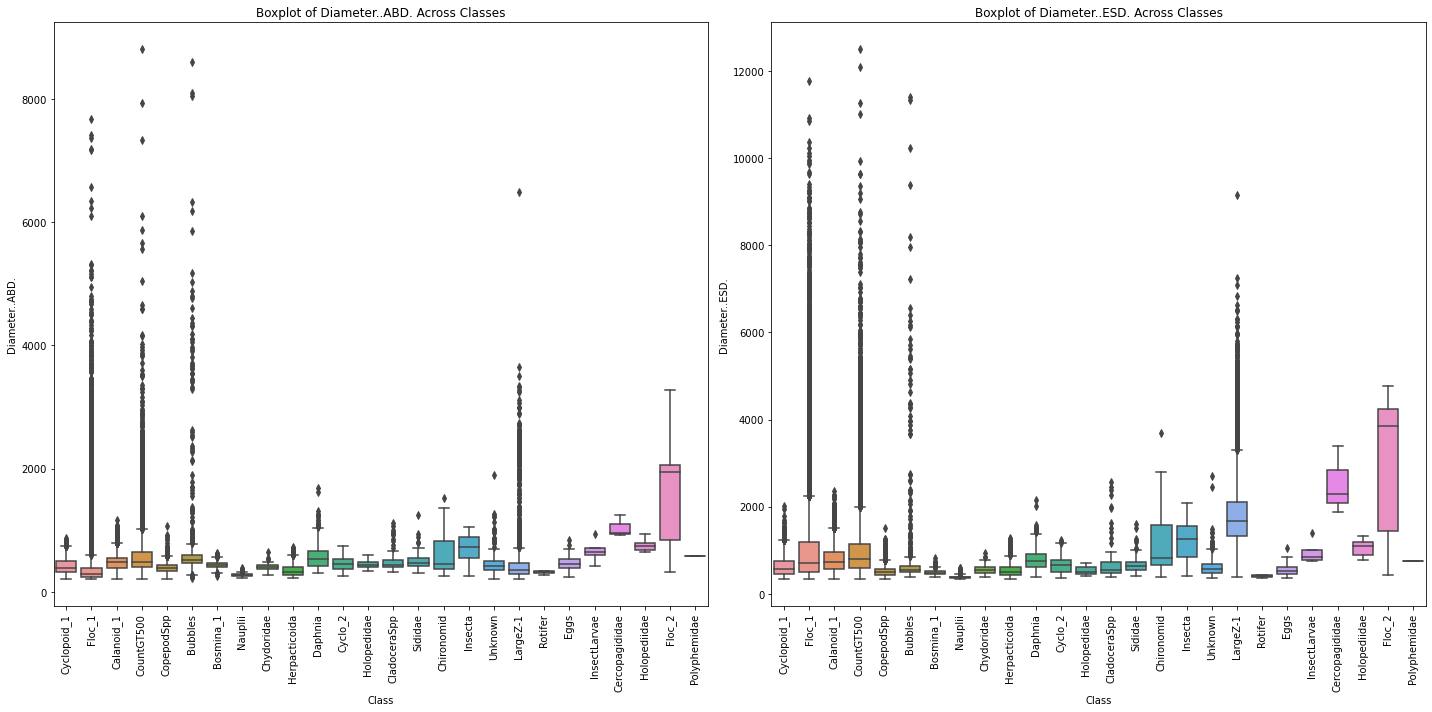

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 10))

# Boxplot for Diameter..ABD.
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Diameter..ABD.', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Diameter..ABD. Across Classes')
plt.xlabel('Class')
plt.ylabel('Diameter..ABD.')

# Boxplot for Diameter..ESD.
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Diameter..ESD.', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Diameter..ESD. Across Classes')
plt.xlabel('Class')
plt.ylabel('Diameter..ESD.')

# Show plots
plt.tight_layout()
plt.show()

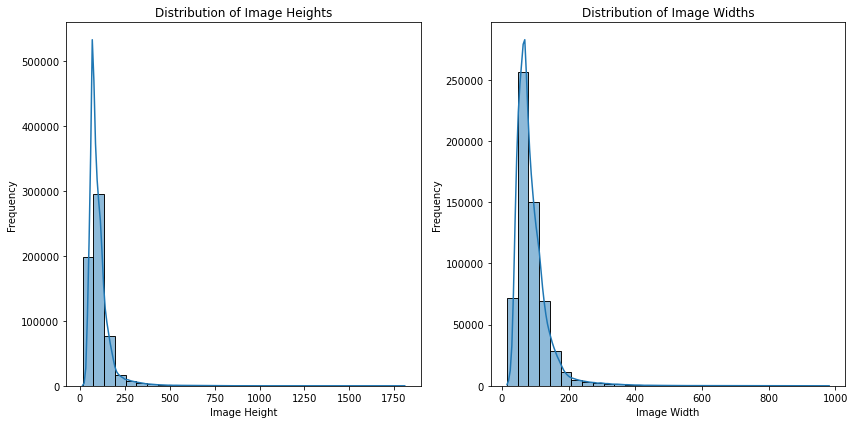

<Figure size 432x288 with 0 Axes>

In [13]:
# Analysis on Image Height and Width
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Image.Height'], bins=30, kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Image Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Image.Width'], bins=30, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Image Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show plots
plt.tight_layout()
plt.show()



In [14]:
df['Image.Size'] = df['Image.Height'] * df['Image.Width']

display(df['Image.Height'].describe().astype(int))
display(df['Image.Width'].describe().astype(int))
display(df['Image.Size'].describe().astype(int))

count    604235
mean        104
std          65
min          14
25%          69
50%          88
75%         120
max        1809
Name: Image.Height, dtype: int32

count    604235
mean         88
std          51
min          15
25%          58
50%          76
75%         105
max         981
Name: Image.Width, dtype: int32

count     604235
mean       10962
std        21899
min         1260
25%         4160
50%         6675
75%        10976
max      1546695
Name: Image.Size, dtype: int32

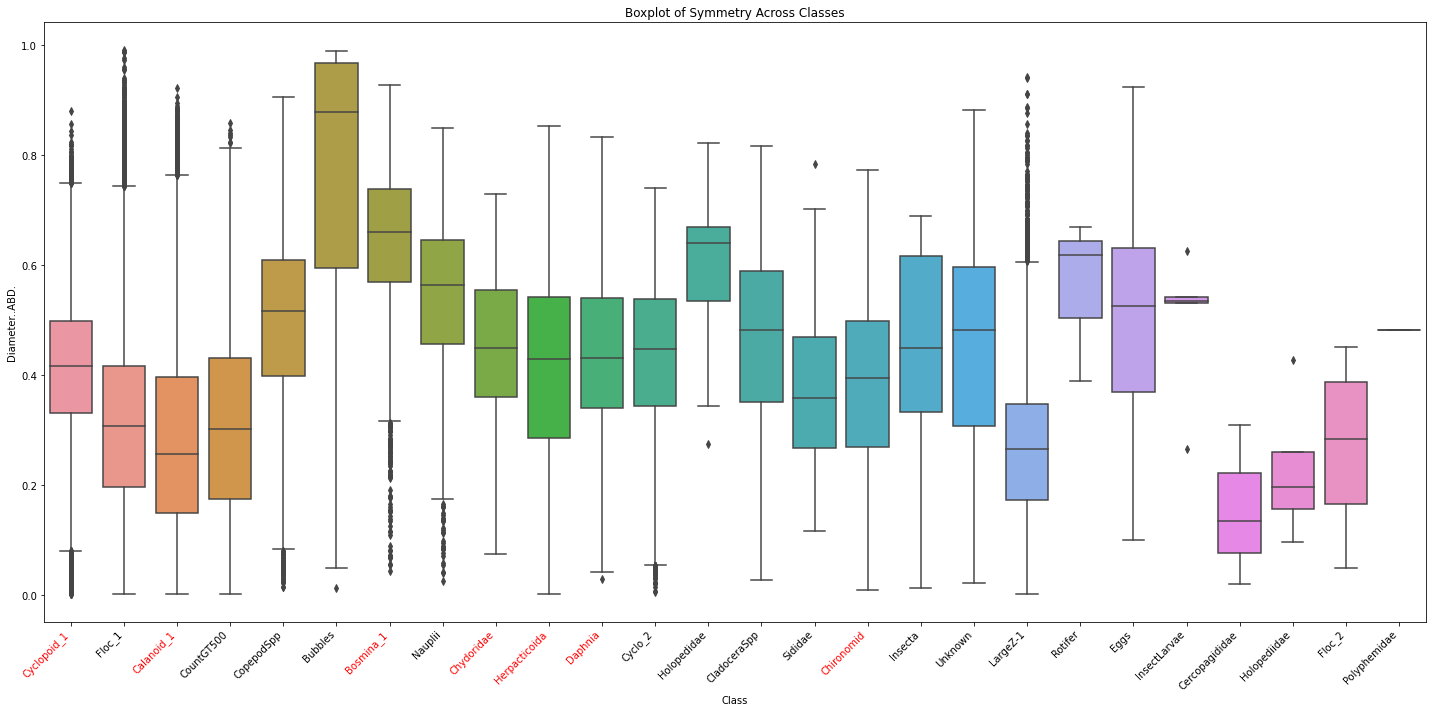

In [24]:
# Set figure size
plt.figure(figsize=(20, 10))

# Boxplot for Diameter..ABD.
sns.boxplot(x='Class', y='Symmetry', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Symmetry Across Classes')
plt.xlabel('Class')
plt.ylabel('Diameter..ABD.')

# Highlight specific class labels in red
highlight_classes = {'Calanoid_1', 'Cyclopoid_1', 'Bosmina_1', 'Herpacticoida', 'Chironomid', 'Chydoridae', 'Daphnia'}
plt.xticks(rotation=45, ha='right', fontsize=10)
ax = plt.gca()
for tick in ax.get_xticklabels():
    if tick.get_text() in highlight_classes:
        tick.set_color('red')

# Show plots
plt.tight_layout()
plt.show()

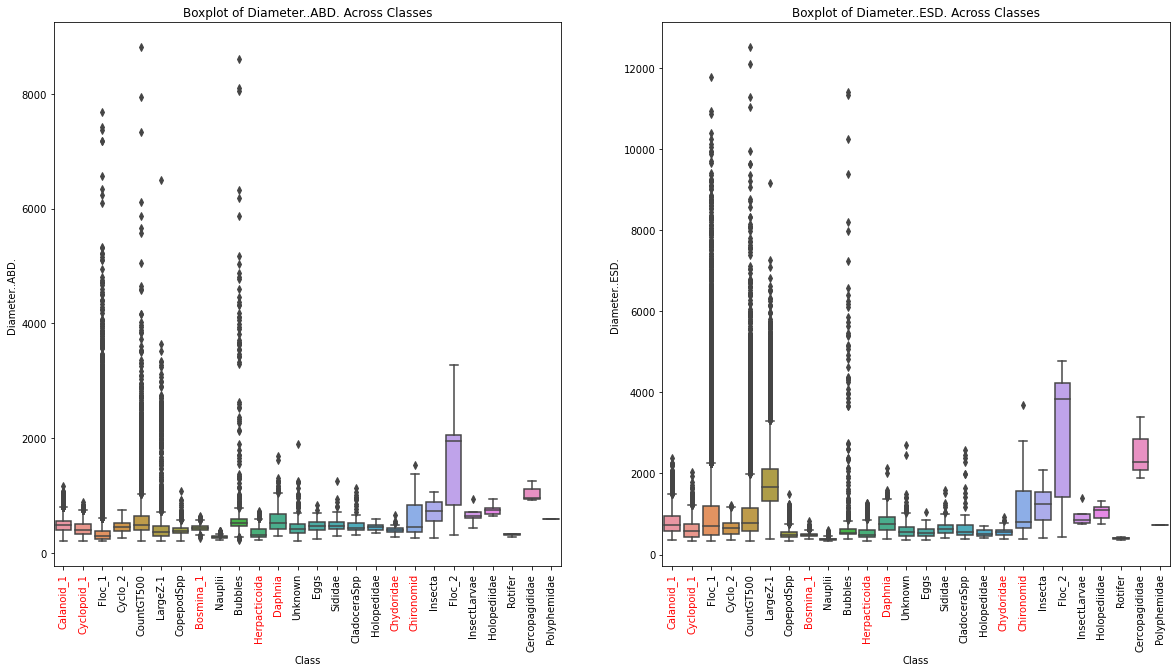

In [23]:
# Set figure size
plt.figure(figsize=(20, 10))

# Highlight specific class labels in red
highlight_classes = {'Calanoid_1', 'Cyclopoid_1', 'Bosmina_1', 'Herpacticoida', 'Chironomid', 'Chydoridae', 'Daphnia'}

# Boxplot for Diameter..ABD.
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Diameter..ABD.', data=df, order=class_order)
plt.xticks(rotation=90)
plt.title('Boxplot of Diameter..ABD. Across Classes')
plt.xlabel('Class')
plt.ylabel('Diameter..ABD.')
ax = plt.gca()
for tick in ax.get_xticklabels():
    if tick.get_text() in highlight_classes:
        tick.set_color('red')

# Boxplot for Diameter..ESD.
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Diameter..ESD.', data=df, order=class_order)
plt.xticks(rotation=90)
plt.title('Boxplot of Diameter..ESD. Across Classes')
plt.xlabel('Class')
plt.ylabel('Diameter..ESD.')
ax = plt.gca()
for tick in ax.get_xticklabels():
    if tick.get_text() in highlight_classes:
        tick.set_color('red')